In [121]:
import torch 
import urllib
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

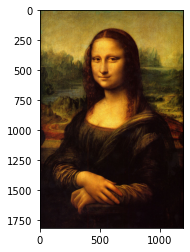

In [316]:
## Load the untransformed image

filename = "images/mona.jpg"
img = Image.open(filename)

plt.imshow(img)
# img = np.stack((img, )*3, axis = -1)
# img = Image.fromarray(img)

Using cache found in /home/ra/.cache/torch/hub/pytorch_vision_v0.10.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


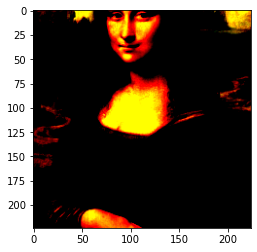

In [317]:
## Load the model and show the input image

# model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained = True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trans = transforms.ToPILImage()
img_tensor = preprocess(img)

img_arr = img_tensor.cpu().detach().numpy()
plt.imshow(img_arr.transpose(1, 2, 0))

In [318]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

model.eval()

In [319]:
## Set the activation hooks to get the intermediate outputs

dic = 0
dic = {}

def getactivation(name):
    def hook_func(m, inp, op):
        dic[name] = op.detach()
    return hook_func

conv1 = model.features[0]
conv2 = model.features[2]
conv3 = model.features[4]
conv4 = model.features[6]


c1 = conv1.register_forward_hook(getactivation('c1'))
c2 = conv2.register_forward_hook(getactivation('c2'))
c3 = conv3.register_forward_hook(getactivation('c3'))
c4 = conv4.register_forward_hook(getactivation('c4'))


output = model(img_tensor.reshape(1, 3, 224, 224))

c1.remove()
c2.remove()
c3.remove()
c4.remove()

print(dic['c2'].shape)

torch.Size([1, 64, 112, 112])


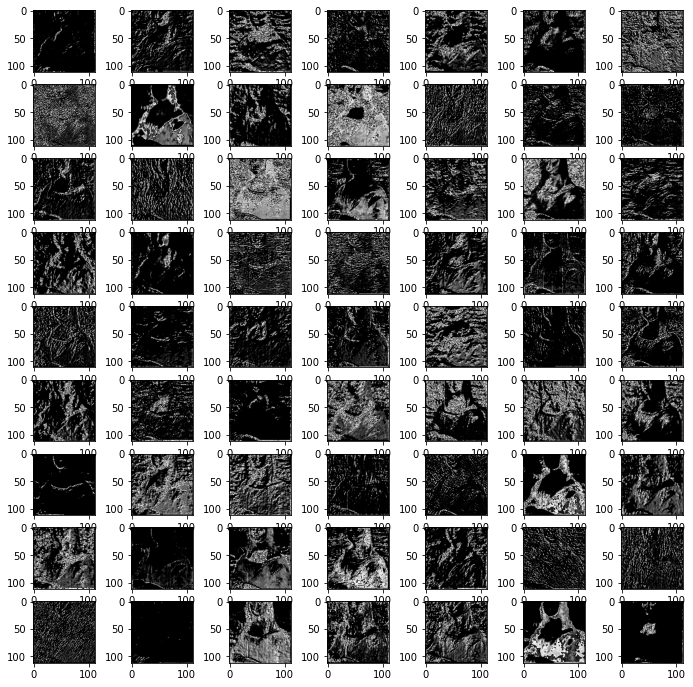

In [320]:
## Show the intermediate outputs for any layer in the network

_, axs = plt.subplots(9, 7, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c3'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()

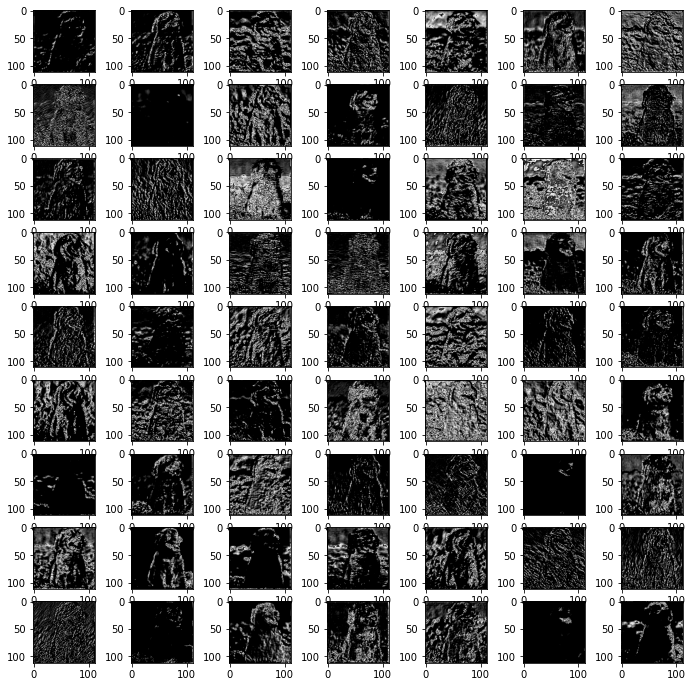

In [315]:

_, axs = plt.subplots(9, 7, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c3'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()

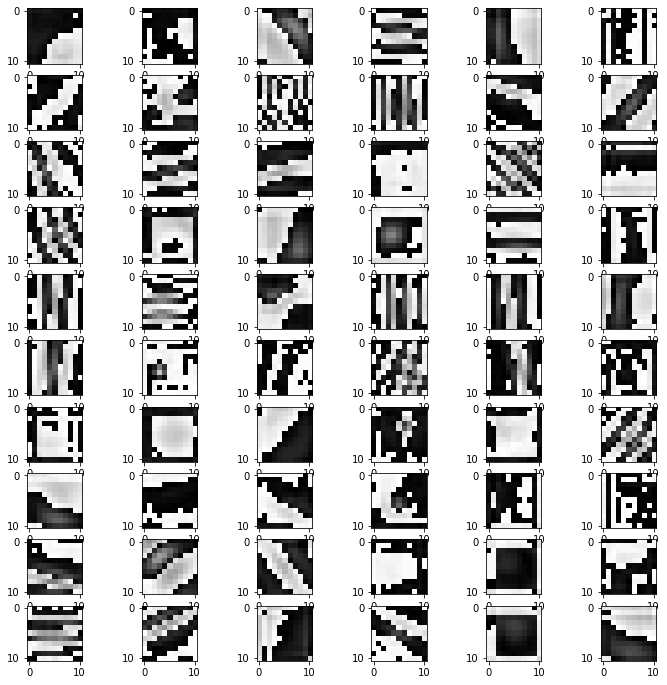

In [296]:
## Show the weights of the specified layer as images

params = list(model.parameters())

trans = transforms.ToPILImage()
conv1_w = params[0]
_, axs = plt.subplots(10, 6, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(conv1_w, axs):
    ax.imshow(trans(img[0]), cmap='gray')
plt.show()